### Project Overview
- You are assigned to retrieve 5 years of data on secirities belinging to the S&P500, Nasdaq, and Russell
- You will Use the ADJ Close and Volume(daily change)  of these companie to try to predict the value of the UVXY 
- Use feature engineering to  try to generate more features for the data set, how do these features coorelate to UVXY
- Does these valuse have any predictive abilities on UVXY?
- Keep in mind you will be working with alot of companies and features so consider a method to reduce these features, may be attempt a PCA and see how the results will pan out

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data as web

## importing Tickers 
- WE will import all tickers from Nasdaq, S&P, and Russell as of 2020

In [2]:
sandp = pd.read_csv("resources/companies.csv")

In [3]:
len(sandp["Symbol"])

505

In [4]:
russell = pd.read_excel("resources/Russle_2000_2020.xlsx")

In [5]:
russell_tickers = list(russell["Ticker"])

In [6]:
len(russell_tickers)

1999

In [7]:
russell_zip = dict(zip(russell["Ticker"], russell["Name"]))

In [8]:
nasdaq = pd.read_excel("resources/nasdaq_100_stocks.xlsx")

In [9]:
nasdaq_tickers = nasdaq["Ticker"]

In [10]:
len(nasdaq_tickers)

103

In [11]:
nasdaq_zipp = dict(zip(nasdaq["Ticker"], nasdaq["Name"]))

## Zipping
- We will zip the ticker and the company's name together if we need to query the company's name at some point

In [12]:
sandpZip = dict(zip(sandp["Symbol"], sandp["Name"]))

## Getting Stock Data for Each ticker 
- We will begin with the adj Close

### Saving
- because this is a taxing task to gather a little over 4000 companies Adj Close over a 5 year period 
- once we have done it we will save the data frame to a csv file for future reference
- WE do not want to have to fetchingthe data every time
- We will then import the data below

In [13]:
df = pd.read_csv("resources/securityData.csv", index_col="Date")

In [14]:
len(df.columns)

2321

### Fetching Penny Stocks from the data
- These will be stocks under 3 dollars for our consideration

In [15]:
recent_date = df.index.max()

In [16]:
df_sorted = pd.DataFrame(df.loc[recent_date].sort_values())

In [17]:
df_sorted.columns = ["price"]

In [31]:
stocks_under_3 = df_sorted[df_sorted["price"] < 2].transpose()

In [32]:
stocks_under_3

,SCG,YGYI,TEUM,GEN,CFMS,ASRT,PTN,SONM,AVCO,USWS,PTE,RMTI,SVRA,HNRG,CSLT,TXMD,GERN
price,0.045,0.4,0.59,1.02,1.12,1.14,1.15,1.18,1.41,1.47,1.69,1.75,1.75,1.85,1.87,1.91,1.92


In [33]:
###stocks_under_3.to_csv("resources/stocks_under_3_2_12_2020.csv")

In [34]:
len(stocks_under_3.columns)

17

### Fetchinng data
- BEst way to use this data is to track momentum for the last 30 days
- We will optimize a portfolio using the data for all of these companies for the last 30 days
- Then will find the highert weighted 10 companies and create a portfolio with just those

In [35]:
working_frame = df[stocks_under_3.columns].loc["2020-12-31":]

In [36]:
len(working_frame)

30

## Checking for missing data

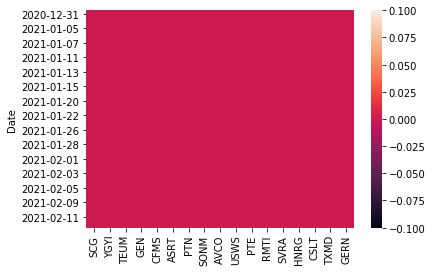

In [37]:
sns.heatmap(working_frame.isnull())

### Checking Coorelation

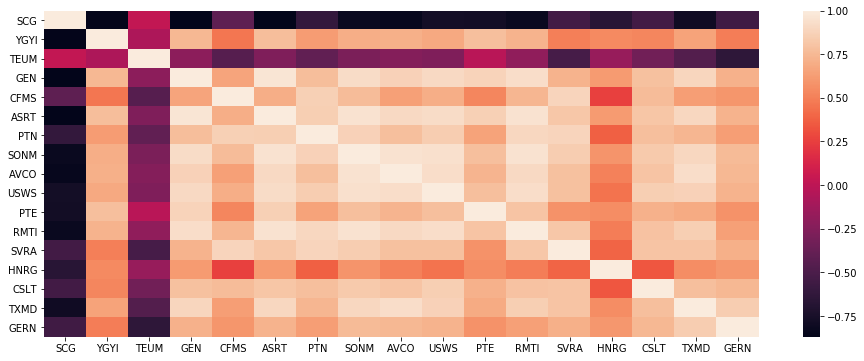

In [38]:
plt.figure(figsize=(16,6))
sns.heatmap(working_frame.corr())

### Getting the returns for the portfolio 

In [39]:
working_frame_returns = working_frame.pct_change()

In [40]:
working_frame_returns

,SCG,YGYI,TEUM,GEN,CFMS,ASRT,PTN,SONM,AVCO,USWS,PTE,RMTI,SVRA,HNRG,CSLT,TXMD,GERN
Date,,,,,,,,,,,,,,,,,
2020-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-04,0.0,-0.023973,0.033898,0.041667,0.004545,0.222222,0.000000,0.023481,0.000000,-0.048781,0.073529,0.019802,0.017391,0.020408,0.000000,0.024793,0.025157
2021-01-05,0.0,0.087719,-0.032787,0.140000,0.131222,0.068182,0.044118,0.035088,0.008929,0.153846,0.054794,0.019417,0.034188,0.113333,0.030769,0.064516,-0.012270
2021-01-06,0.0,-0.048387,0.016949,-0.035088,0.004000,0.063830,-0.042253,-0.020861,-0.008850,0.000000,-0.038961,0.019048,0.016529,-0.047904,0.082090,-0.022727,-0.006211
2021-01-07,0.0,0.057627,0.016667,0.054545,0.077025,-0.020000,0.044118,0.034621,0.044643,0.022222,0.040541,0.000000,0.065041,0.006289,0.110345,0.038760,0.050000
2021-01-08,0.0,0.076923,-0.016393,0.017241,-0.019729,0.102041,-0.028169,-0.030888,-0.008547,0.065217,0.714286,0.028037,0.000000,-0.068750,0.006211,-0.007463,0.017857
2021-01-11,0.0,-0.010417,0.000000,0.050848,0.047799,0.111111,0.028985,0.035857,0.008621,0.061224,-0.053030,0.018182,0.022901,-0.046980,-0.024691,0.067669,-0.040936
2021-01-12,0.0,-0.127820,0.033333,0.096774,0.020408,0.016667,0.000000,0.014103,0.000000,0.480769,-0.112000,0.053571,0.022388,-0.049296,0.006329,-0.035211,0.000000
2021-01-13,0.0,-0.120690,-0.016129,0.132353,0.017647,0.098361,0.098592,0.099874,0.008547,-0.038961,0.036036,0.059322,-0.014599,0.118518,0.050314,0.036496,-0.012195


### Optimizing this portfolio 

In [41]:
n_portfolios = 2000
all_weights = np.zeros((n_portfolios, len(working_frame.columns)))
all_Sharps = np.zeros(n_portfolios)
all_vol = np.zeros(n_portfolios)
all_returns = np.zeros(n_portfolios)

for ind in range(n_portfolios):
    weights = np.array(np.random.random(len(working_frame.columns)))
    weights = weights/weights.sum()
    all_weights[ind,:] = weights
    
    all_returns[ind] = np.sum(working_frame_returns.mean() * weights * 252)
    all_vol[ind] = np.sqrt(np.dot(weights.T, np.dot(working_frame_returns.cov() * 252, weights)))
    all_Sharps[ind] = all_returns[ind]/all_vol[ind]

### MaX Sharp, Max Returns, Lowest Vol

In [42]:
max_returns = all_returns.argmax()

In [43]:
max_sharp = all_Sharps.argmax()

In [44]:
lowest_vol = all_vol.argmin()

### Plotting this Plot

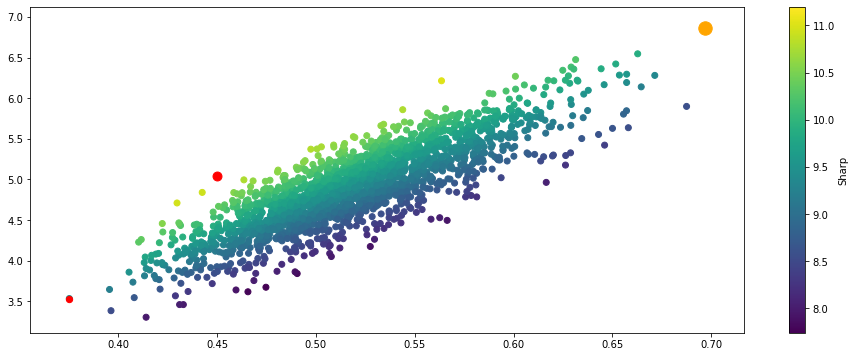

In [45]:
plt.figure(figsize=(16,6))
plt.scatter(all_vol, all_returns, c=all_Sharps)
plt.colorbar(label = "Sharp")
plt.scatter(all_vol[max_sharp], all_returns[max_sharp], c="red", s = 80)
plt.scatter(all_vol[lowest_vol], all_returns[lowest_vol], c="red", s = 40)
plt.scatter(all_vol[max_returns], all_returns[max_returns], c="orange", s = 180)

### Appears There is a portfolio that is returning over 600%
- Also a sharp ratio of 16
- We will find this portfolio 

### lets set up our frontier data frame

In [46]:
front_weights = pd.DataFrame(all_weights, columns=working_frame.columns)

In [47]:
front_return = pd.DataFrame(all_returns, columns=["return"])

In [48]:
front_vol = pd.DataFrame(all_vol, columns=["vol"])

In [49]:
front_shp = pd.DataFrame(all_Sharps, columns=["shp"])

### lets put it all together
- We will merge all of the details together for this portfolio

In [50]:
frontier = pd.concat([front_return, front_shp,front_vol, front_weights], axis=1)

## Sorting by highest return

In [51]:
frontier = frontier.sort_values("return", ascending = False)

In [52]:
frontier

,return,shp,vol,SCG,YGYI,TEUM,GEN,CFMS,ASRT,PTN,SONM,AVCO,USWS,PTE,RMTI,SVRA,HNRG,CSLT,TXMD,GERN
1204,6.862426,9.846119,0.696968,0.000016,0.029094,0.002922,0.065152,0.125234,0.119870,0.121283,0.015798,0.013791,0.108023,0.098612,0.085269,0.006733,0.042134,0.025746,0.075856,0.064467
1038,6.545586,9.875950,0.662780,0.007709,0.036425,0.069940,0.125580,0.091034,0.120887,0.063115,0.054444,0.058442,0.110201,0.077802,0.065973,0.039257,0.026471,0.035527,0.001282,0.015910
358,6.474181,10.253697,0.631400,0.007559,0.038947,0.080351,0.066425,0.038349,0.122012,0.020292,0.033635,0.041231,0.131835,0.116116,0.018154,0.060203,0.107138,0.026313,0.067867,0.023570
1515,6.420518,9.852116,0.651689,0.024791,0.068564,0.004997,0.110624,0.118417,0.082293,0.015626,0.012075,0.017289,0.080858,0.127510,0.039346,0.133085,0.017017,0.052098,0.058146,0.037264
880,6.382926,10.145853,0.629117,0.048058,0.015484,0.019660,0.005936,0.097755,0.189437,0.171788,0.039881,0.041240,0.105987,0.029609,0.009045,0.019885,0.048468,0.001067,0.119122,0.037579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588,3.536070,9.421960,0.375301,0.109102,0.074014,0.117078,0.052495,0.062063,0.023939,0.102582,0.003609,0.007345,0.033263,0.020765,0.001163,0.048337,0.093851,0.107211,0.030301,0.112885
1390,3.461821,8.030556,0.431081,0.126484,0.115631,0.021829,0.004931,0.050579,0.012344,0.090578,0.109890,0.041962,0.004590,0.014848,0.077066,0.041461,0.128900,0.075996,0.040349,0.042563
1175,3.461779,7.995149,0.432985,0.128769,0.018985,0.042918,0.071633,0.122647,0.003655,0.036003,0.099384,0.040850,0.010411,0.006603,0.011626,0.114442,0.104952,0.044170,0.043090,0.099862
850,3.386740,8.543883,0.396394,0.108405,0.005452,0.124962,0.055099,0.030603,0.043886,0.041561,0.092612,0.021404,0.015868,0.005824,0.063208,0.039410,0.121965,0.076434,0.031728,0.121579


In [53]:
##frontier.to_csv("resources/penny_analysis/frontier_Data_all.csv")

### Lets look at the top 10 companies in this portfolio by weight 

In [54]:
frontier.drop(["return","shp","vol"], axis=1).iloc[0].sort_values(ascending = False).head(10)

CFMS    0.125234
PTN     0.121283
ASRT    0.119870
USWS    0.108023
PTE     0.098612
RMTI    0.085269
TXMD    0.075856
GEN     0.065152
GERN    0.064467
HNRG    0.042134
Name: 1204, dtype: float64

#### Optimization of  top 10 weighed companies this portfolio

In [55]:
top_10_tickers = frontier.drop(["return","shp","vol"], axis=1).iloc[0].sort_values(ascending = False).head(10).index

In [56]:
top_10_tickers

Index(['CFMS', 'PTN', 'ASRT', 'USWS', 'PTE', 'RMTI', 'TXMD', 'GEN', 'GERN',
       'HNRG'],
      dtype='object')

In [57]:
top_10_df = working_frame[top_10_tickers]

In [58]:
top_10_df_returns = top_10_df.pct_change()

In [59]:
top_10_df_returns

,CFMS,PTN,ASRT,USWS,PTE,RMTI,TXMD,GEN,GERN,HNRG
Date,,,,,,,,,,
2020-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-04,0.004545,0.000000,0.222222,-0.048781,0.073529,0.019802,0.024793,0.041667,0.025157,0.020408
2021-01-05,0.131222,0.044118,0.068182,0.153846,0.054794,0.019417,0.064516,0.140000,-0.012270,0.113333
2021-01-06,0.004000,-0.042253,0.063830,0.000000,-0.038961,0.019048,-0.022727,-0.035088,-0.006211,-0.047904
2021-01-07,0.077025,0.044118,-0.020000,0.022222,0.040541,0.000000,0.038760,0.054545,0.050000,0.006289
2021-01-08,-0.019729,-0.028169,0.102041,0.065217,0.714286,0.028037,-0.007463,0.017241,0.017857,-0.068750
2021-01-11,0.047799,0.028985,0.111111,0.061224,-0.053030,0.018182,0.067669,0.050848,-0.040936,-0.046980
2021-01-12,0.020408,0.000000,0.016667,0.480769,-0.112000,0.053571,-0.035211,0.096774,0.000000,-0.049296
2021-01-13,0.017647,0.098592,0.098361,-0.038961,0.036036,0.059322,0.036496,0.132353,-0.012195,0.118518


## Optimizing this portfolio 

In [60]:
n_portfolios = 3000
all_weights = np.zeros((n_portfolios, len(top_10_df.columns)))
all_Sharps = np.zeros(n_portfolios)
all_vol = np.zeros(n_portfolios)
all_returns = np.zeros(n_portfolios)

for ind in range(n_portfolios):
    weights = np.array(np.random.random(len(top_10_df.columns)))
    weights = weights/weights.sum()
    all_weights[ind,:] = weights
    
    all_returns[ind] = np.sum(top_10_df_returns.mean() * weights * 252)
    all_vol[ind] = np.sqrt(np.dot(weights.T, np.dot(top_10_df_returns.cov() * 252, weights)))
    all_Sharps[ind] = all_returns[ind]/all_vol[ind]

In [61]:
m_shp = all_Sharps.argmax()

In [62]:
m_ret = all_returns.argmax()

In [63]:
l_vol = all_vol.argmin()

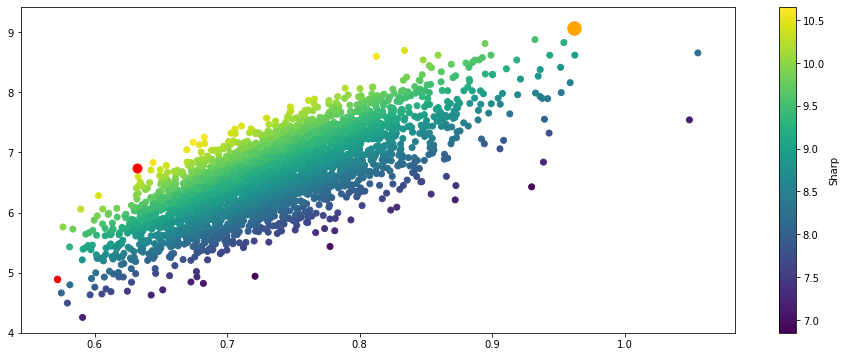

In [64]:
plt.figure(figsize=(16,6))
plt.scatter(all_vol, all_returns, c=all_Sharps)
plt.colorbar(label = "Sharp")
plt.scatter(all_vol[m_shp], all_returns[m_shp], c="red", s = 80)
plt.scatter(all_vol[l_vol], all_returns[l_vol], c="red", s = 40)
plt.scatter(all_vol[m_ret], all_returns[m_ret], c="orange", s = 180)

In [65]:
f_weights = pd.DataFrame(all_weights, columns=top_10_df.columns)

In [66]:
f_ret = pd.DataFrame(all_returns, columns=["return"])

In [67]:
f_vol = pd.DataFrame(all_vol, columns=["vol"])

In [68]:
f_shp = pd.DataFrame(all_Sharps, columns=["shp"])

In [69]:
top_10_Frontier = pd.concat([f_vol,f_ret,f_shp,f_weights], axis=1)

## Max retuurn
- Sorted below
- Lest look at the companies that carry the mose weight in this portfolio

In [70]:
top_10_Frontier.sort_values("return", ascending = False)

,vol,return,shp,CFMS,PTN,ASRT,USWS,PTE,RMTI,TXMD,GEN,GERN,HNRG
9,0.962013,9.071895,9.430112,0.037233,0.119395,0.235522,0.151852,0.189781,0.026238,0.001995,0.210970,0.003849,0.023165
854,0.932257,8.879098,9.524301,0.007417,0.032822,0.255222,0.162882,0.172467,0.074054,0.041477,0.170530,0.065853,0.017276
2281,0.954092,8.830486,9.255382,0.056389,0.108782,0.141536,0.259153,0.181039,0.190812,0.005406,0.007044,0.021686,0.028154
2992,0.894606,8.813662,9.852002,0.145559,0.033144,0.195887,0.201445,0.196996,0.022204,0.019976,0.089298,0.046010,0.049481
1539,0.833836,8.699481,10.433083,0.172162,0.064845,0.215319,0.237772,0.146580,0.003337,0.000989,0.018869,0.055528,0.084600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,0.605499,4.643696,7.669203,0.024065,0.087506,0.013746,0.052030,0.022796,0.208023,0.087892,0.074189,0.186213,0.243541
925,0.596643,4.630108,7.760267,0.045545,0.075581,0.090323,0.011344,0.002583,0.028469,0.231112,0.102091,0.233590,0.179362
119,0.642707,4.626066,7.197784,0.163798,0.040952,0.043451,0.006767,0.011285,0.143993,0.046882,0.125754,0.178772,0.238346
92,0.579497,4.493190,7.753609,0.123776,0.162939,0.015591,0.009274,0.048857,0.095749,0.182571,0.013919,0.191320,0.156004


### Rearranging the frontier
- Below we can see by weight which companies are leading the portfolio by weight for a max return

In [75]:
top_10_Frontier.sort_values("return", ascending = False).drop(["return", "vol", "shp"], axis=1).iloc[0].sort_values()

TXMD    0.001995
GERN    0.003849
HNRG    0.023165
RMTI    0.026238
CFMS    0.037233
PTN     0.119395
USWS    0.151852
PTE     0.189781
GEN     0.210970
ASRT    0.235522
Name: 9, dtype: float64